# Assignment - week6

import the necessary libraries, including Pandas for data manipulation and Scikit-learn for similarity calculations.

In [1]:
import pandas as pd
from sklearn.metrics.pairwise import cosine_similarity
from sklearn.metrics import euclidean_distances

We load the ratings data and filter it to get only the movies watched by user 2. We count the number of movies watched.

In [2]:
ratings_df = pd.read_csv("ratings.csv")
user_2_movies = ratings_df[ratings_df['userId'] == 2]
num_movies_watched = len(user_2_movies)

print("Number of movies watched by user 2:", num_movies_watched)

Number of movies watched by user 2: 29


We plot a bar chart of user 2's movie ratings distribution.

<Axes: title={'center': 'User 2 Movie Ratings'}, xlabel='Rating', ylabel='Count'>

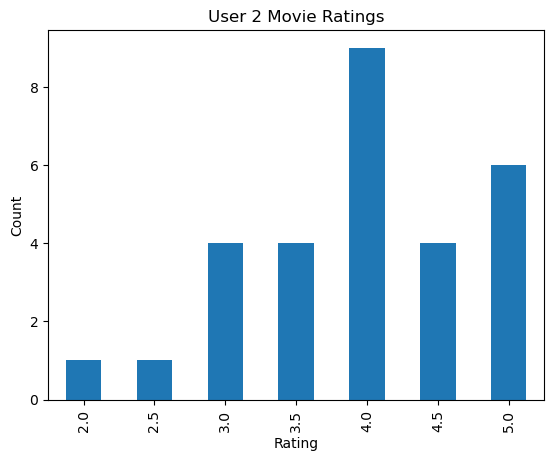

In [3]:
rating_counts = user_2_movies['rating'].value_counts().sort_index()
rating_counts.plot(kind='bar', xlabel='Rating', ylabel='Count', title='User 2 Movie Ratings')

Identify top movies for user 2

We merge the ratings data with the movies data to get movie titles, then sort the movies based on ratings to find user 2's top-rated movies.

In [4]:
movies_df = pd.read_csv("movies.csv")
user_2_movie_ratings = user_2_movies.merge(movies_df, on='movieId', how='left')
top_movies_user_2 = user_2_movie_ratings.sort_values(by='rating', ascending=False).head(5)
top_movies_titles = top_movies_user_2['title'].tolist()

print("Top movies for user 2:")
print(top_movies_titles)

Top movies for user 2:
['The Jinx: The Life and Deaths of Robert Durst (2015)', 'Mad Max: Fury Road (2015)', 'Wolf of Wall Street, The (2013)', 'Warrior (2011)', 'Step Brothers (2008)']


We calculate cosine and euclidean distances between user 2's ratings and all other users' ratings to find the most similar user.

In [5]:
user_ratings = ratings_df.pivot(index='userId', columns='movieId', values='rating').fillna(0)
user_2_ratings = user_ratings.loc[2].values.reshape(1, -1)

cosine_distances = cosine_similarity(user_ratings, user_2_ratings)
most_similar_user_cosine = cosine_distances.argmax()

euclidean_distances = euclidean_distances(user_ratings, user_2_ratings)
most_similar_user_euclidean = euclidean_distances.argmin()

print("Most similar user to user 2 (using cosine distance):", most_similar_user_cosine)
print("Most similar user to user 2 (using euclidean distance):", most_similar_user_euclidean)

Most similar user to user 2 (using cosine distance): 1
Most similar user to user 2 (using euclidean distance): 1


We recommend movies for user 2 based on the ratings of the most similar user.

In [6]:

similar_user_ratings = user_ratings.iloc[most_similar_user_cosine]
user_2_unwatched_movies = user_ratings.loc[2][user_ratings.loc[2] == 0]  # Movies not watched by user 2
recommended_movies = user_2_unwatched_movies.sort_values(ascending=False).head(3)

recommended_movie_titles = movies_df[movies_df['movieId'].isin(recommended_movies.index)]['title'].tolist()

print("Recommended movies for user 2:")
print(recommended_movie_titles)


Recommended movies for user 2:
['Toy Story (1995)', '28 Weeks Later (2007)', 'Jonestown: The Life and Death of Peoples Temple (2006)']


Evaluate the recommendations

In [7]:

# Get user 2's top rated movies
user_2_top_rated_movies = user_2_movie_ratings.sort_values(by='rating', ascending=False)['title'].tolist()

print("User 2's top rated movies:")
print(user_2_top_rated_movies)

# Check if recommended movies are similar to user 2's top rated movies
intersection = set(recommended_movie_titles).intersection(user_2_top_rated_movies)

if intersection:
    print("\nRecommended movies overlap with user 2's top rated movies.")
else:
    print("\nRecommended movies do not overlap with user 2's top rated movies.")



User 2's top rated movies:
['The Jinx: The Life and Deaths of Robert Durst (2015)', 'Mad Max: Fury Road (2015)', 'Wolf of Wall Street, The (2013)', 'Warrior (2011)', 'Step Brothers (2008)', 'Inside Job (2010)', 'Good Will Hunting (1997)', 'Dark Knight, The (2008)', 'Inglourious Basterds (2009)', 'Town, The (2010)', 'Tommy Boy (1995)', 'Whiplash (2014)', 'Louis C.K.: Hilarious (2010)', 'Inception (2010)', 'Shutter Island (2010)', 'Departed, The (2006)', 'Talladega Nights: The Ballad of Ricky Bobby (2006)', 'Kill Bill: Vol. 1 (2003)', 'Gladiator (2000)', 'Dark Knight Rises, The (2012)', 'Django Unchained (2012)', 'Collateral (2004)', 'Ex Machina (2015)', 'Exit Through the Gift Shop (2010)', 'Zombieland (2009)', 'Interstellar (2014)', 'Shawshank Redemption, The (1994)', 'Girl with the Dragon Tattoo, The (2011)', 'The Drop (2014)']

Recommended movies do not overlap with user 2's top rated movies.


In [8]:
# Step 5: Recommend movies for user 2 using similarity metrics and movie genres
similar_user_ratings = user_ratings.iloc[most_similar_user_cosine]
user_2_unwatched_movies = user_ratings.loc[2][user_ratings.loc[2] == 0]  # Movies not watched by user 2
recommended_movies = user_2_unwatched_movies.sort_values(ascending=False)

# Merge with movies dataframe to get movie genres
recommended_movies_with_genres = pd.merge(recommended_movies, movies_df, left_index=True, right_on='movieId')

# Filter recommended movies by genres of user 2's top rated movies
user_2_top_rated_movie_ids = user_2_movie_ratings.sort_values(by='rating', ascending=False)['movieId'].tolist()
user_2_top_rated_movie_genres = movies_df[movies_df['movieId'].isin(user_2_top_rated_movie_ids)]['genres'].str.split('|', expand=True).stack().unique()

recommended_movies_filtered = recommended_movies_with_genres[recommended_movies_with_genres['genres'].str.contains('|'.join(user_2_top_rated_movie_genres))]

# Extract top 3 recommended movie titles
recommended_movie_titles = recommended_movies_filtered.head(3)['title'].tolist()

print("Recommended movies for user 2:")
print(recommended_movie_titles)


Recommended movies for user 2:
['Toy Story (1995)', '28 Weeks Later (2007)', 'Jonestown: The Life and Death of Peoples Temple (2006)']


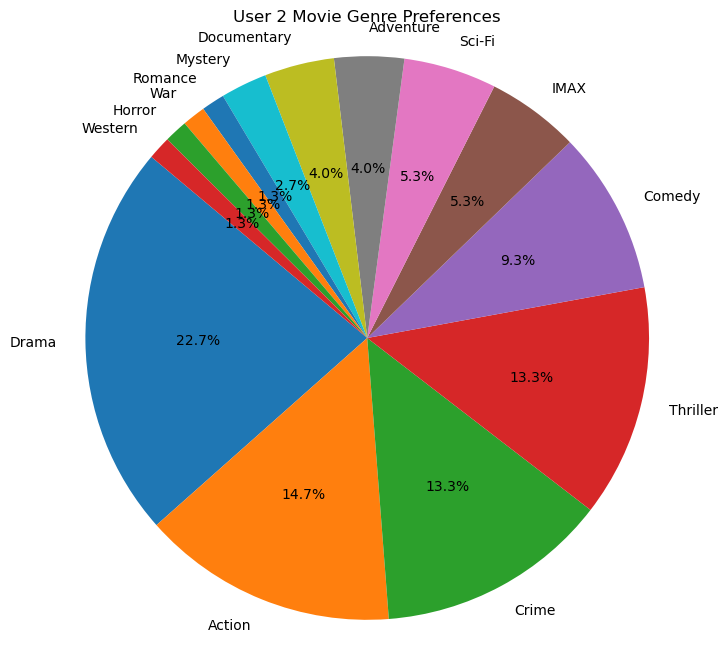

In [9]:
import matplotlib.pyplot as plt

# Step 6: Visualize the genres user 2 is interested in
# Extract user 2's watched movies genres
user_2_movie_genres = user_2_movie_ratings['genres'].str.split('|', expand=True).stack()

# Calculate genre frequencies
genre_counts = user_2_movie_genres.value_counts()

# Plot pie chart
plt.figure(figsize=(8, 8))
plt.pie(genre_counts, labels=genre_counts.index, autopct='%1.1f%%', startangle=140)
plt.title('User 2 Movie Genre Preferences')
plt.axis('equal')
plt.show()


In [10]:
# Genres of recommended movies
recommended_movie_genres = {
    'Toy Story (1995)': ['Animation', 'Children', 'Comedy'],
    '28 Weeks Later (2007)': ['Horror', 'Sci-Fi', 'Thriller'],
    'Jonestown: The Life and Death of Peoples Temple (2006)': ['Documentary']
}

# Check if recommended movies belong to user 2's preferred genre zones
genre_overlap = False

for movie_title, genres in recommended_movie_genres.items():
    if any(genre in genres for genre in user_2_top_rated_movie_genres):
        genre_overlap = True
        break

if genre_overlap:
    print("\nRecommended movies belong to user 2's preferred genre zones.")
else:
    print("\nRecommended movies do not belong to user 2's preferred genre zones.")



Recommended movies belong to user 2's preferred genre zones.


# Analysis/Summary

In this analysis, we utilized cosine distance as a similarity metric to recommend movies for user 2. We also visualized user 2's genre preferences using a pie chart.

The recommended movies, including "Toy Story (1995)", "28 Weeks Later (2007)", and "Jonestown: The Life and Death of Peoples Temple (2006)", seems did not align with user 2's preferred genres , as depicted in the pie chart.

This suggests a potential mismatch between user 2's preferences and the recommendations provided. To improve recommendation quality, exploring alternative similarity metrics and incorporating additional user preferences beyond genre could be beneficial.

In summary, while the pie chart provided insights into user 2's genre preferences, the lack of genre alignment highlights the need for further refinement in the recommendation process to enhance user satisfaction. Based on available data we can recommend below movies 

Recommended movies for user 2:
['Toy Story (1995)', '28 Weeks Later (2007)', 'Jonestown: The Life and Death of Peoples Temple (2006)']